# Removendo as duplicadas

In [58]:
import pandas as pd

df = pd.read_csv('googleplaystore.csv')

df_drop_duplicates = df.drop_duplicates(subset=['App'])

# Grafico de barras com os top 5 apps por número de instalação

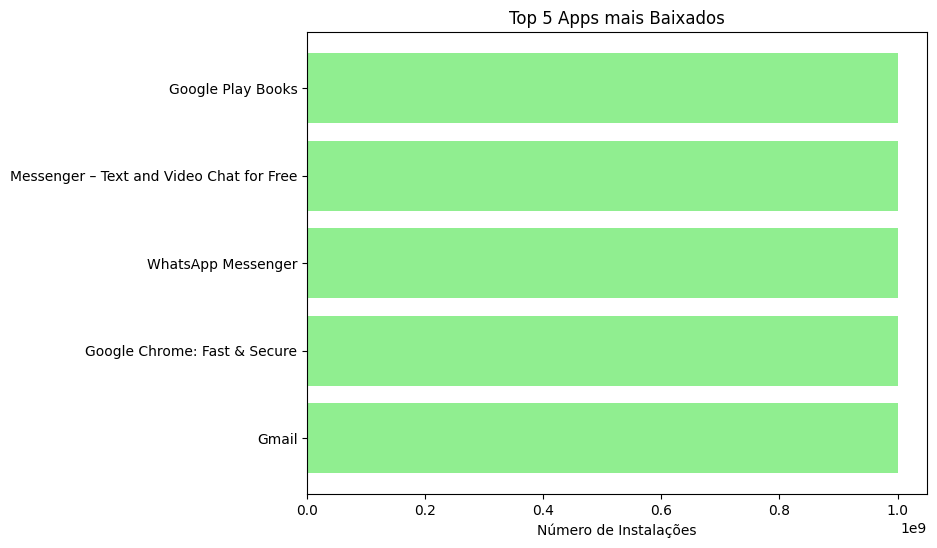

In [59]:
import pandas as pd 
import matplotlib.pyplot as plt

df = df_drop_duplicates

df['Installs'] = df['Installs'].str.replace('+','').str.replace(',','')

df = df[~df['Installs'].str.lower().str.contains('free', na=False)].copy()

df['Installs'] = df['Installs'].astype(int)

topApps = df.nlargest(5, 'Installs')

plt.figure(figsize=(8, 6))
plt.barh(topApps['App'], topApps['Installs'], color='lightgreen')
plt.xlabel('Número de Instalações')
plt.title('Top 5 Apps mais Baixados')
plt.gca().invert_yaxis()
plt.show()

# Grafico de pizza (pie chart) de todas as categorias de apps existentes no dataset de acordo com sua frequência

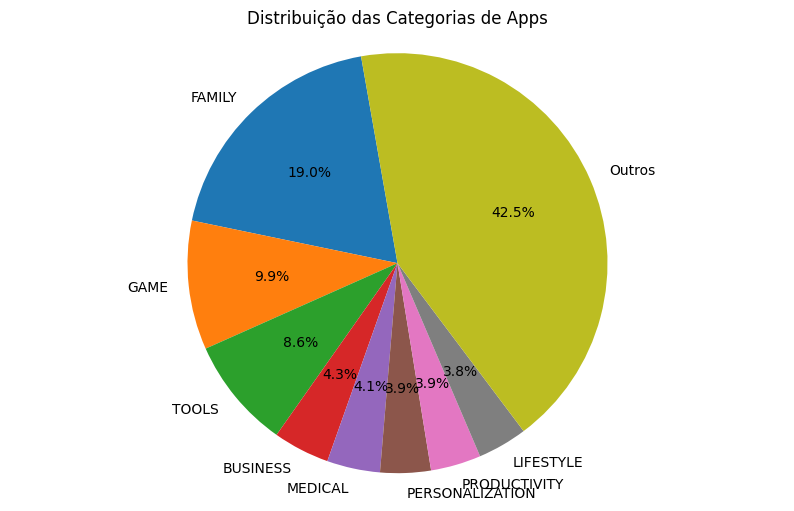

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

df_categories = df_drop_duplicates

count = df_categories['Category'].value_counts()

total_categorias =  count.sum()
porcentagem = count / total_categorias * 100

categoria_porcentagem = count[porcentagem >= 3.6]
categoria_porcentagem['Outros'] = count[porcentagem < 3.6].sum()



plt.figure(figsize=(10, 6))
plt.pie(categoria_porcentagem, labels=categoria_porcentagem.index, autopct='%1.1f%%', startangle=100)
plt.title('Distribuição das Categorias de Apps')
plt.axis('equal')  # Para garantir que o gráfico de pizza seja desenhado como um círculo
plt.show()

# App mais carro do dataset

In [61]:
import pandas as pd

df = df_drop_duplicates

df['Price'] = df['Price'].str.lower().replace('everyone', pd.NA)
df['Price'] = df['Price'].replace({'\\$':''}, regex=True)

df['Price'] = df['Price'].str.strip()

df = df.dropna(subset='Price')

df.loc[:,'Price'] = df['Price'].astype(float)

precos = df['Price'].max()

mais_caro = df[df['Price'] == precos]

print(f"O app mais caro é: {mais_caro['App'].values[0]} que custa {precos}")

O app mais caro é: I'm Rich - Trump Edition que custa 400.0


# Todos os apps classificados como mature 17+

In [62]:
import pandas as pd

df = df_drop_duplicates

app_maior_17 = df[df['Content Rating'] == 'Mature 17+'].shape[0]
# quant = len(app_maior_17)
print(f'Existem {app_maior_17} Apps para maiores de 17 anos')

Existem 393 Apps para maiores de 17 anos


# Top 10 apps por número de review

In [73]:
import pandas as pd

df = df_drop_duplicates

df_avaliacao = df_drop_duplicates.copy()

def convert_reviews(review):
    if isinstance(review, str):
        if 'M' in review:
            return int(float(review.replace('M', '').strip()) * 1_000_000)
        elif 'K' in review:
            return int(float(review.replace('K', '').strip()) * 1_000)
        else:
            return int(review.replace(',', '').strip())
    else:
        return review 

df_avaliacao['Reviews'] = df['Reviews'].apply(convert_reviews)

top_10_apps = df.nlargest(10, 'Reviews')

top_10_apps_nomes = top_10_apps[['App', 'Reviews']]

display(top_10_apps_nomes)


,App,Reviews
2544,Facebook,78158306
336,WhatsApp Messenger,69119316
2545,Instagram,66577313
335,Messenger – Text and Video Chat for Free,56642847
1670,Clash of Clans,44891723
4005,Clean Master- Space Cleaner & Antivirus,42916526
1654,Subway Surfers,27722264
3665,YouTube,25655305
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999
1660,Clash Royale,23133508


# Criação de mais 2 calculos para o script anterior

In [76]:
media = df_avaliacao['Reviews'].mean()
print(f'A media de avaliação dos apps é: {media:.2f}')

A media de avaliação dos apps é: 216880.70
